In [1]:
import os
import sys
#TO RUN IN HOMEENV I NEED THIS... MIGHT HAVE TO REMOVE
sys.path.append("..")
import plotters
import reader
from DataTransformer import DataTransformer

%load_ext autoreload
%autoreload 2

os.chdir('../') # work from project root so the reader gets the right paths
print(os.getcwd())

c:\Users\aceas\Documents\School\Distributed Systems\plotterzz


In [2]:
data = reader.sort_dfs(["Min-Min",])
transformer = DataTransformer(data)

# ECDF for makespan

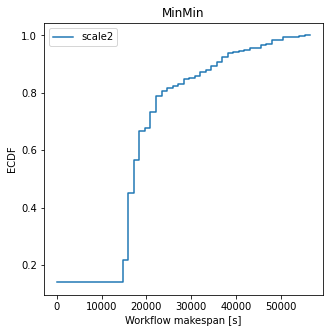

In [3]:
ecdf_data, ecdf_meta = transformer.to_makespan_cdf_per_policy("askalon-ee2-parquet", "homogeneous", "exp_scale_ecdf.png")

plotters.create_makespan_cdf_order_policy(ecdf_data, ecdf_meta)

# Electricity

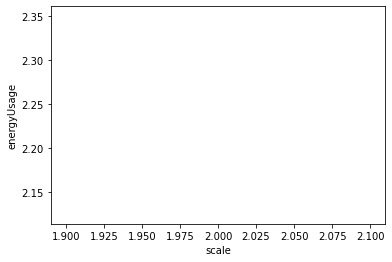

In [4]:
electricity_data, electricity_meta = transformer.to_electricity_scale("askalon-ee2-parquet", "homogeneous", "exp_scale_electricity.png")

plotters.create_energy_plot_scale(electricity_data, electricity_meta)

# Utilization

In [5]:
utilization_data, utilization_meta = transformer.to_utilization_table("askalon-ee2-parquet", "homogeneous", "exp_scale_utilization.png")

utilization_data

,policy,2
0,MinMin,0.783155


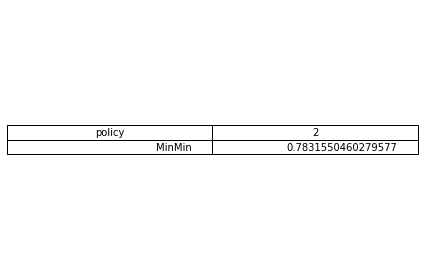

In [6]:
plotters.create_usage_table_per_env(utilization_data, utilization_meta)